**Importing Libraries**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

**Loading** **Data**

In [ ]:
test_data='/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/test'
train_data='/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/train'
valid_data= '/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/Valid' 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Augumentation**

In [ ]:
# overfitting
train_d=ImageDataGenerator(rescale=1./255,rotation_range=40,horizontal_flip=True,height_shift_range=0.2,width_shift_range=0.2,shear_range=0.2,
                           zoom_range=0.2)  #40,horizontal_flip means mirror image
test_d=ImageDataGenerator(rescale=1./255)
valid_d=ImageDataGenerator(rescale=1./255)

In [ ]:
train_df=train_d.flow_from_directory(train_data,batch_size=20,target_size=(150,150),class_mode='binary')

Found 2360 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
valid_df=valid_d.flow_from_directory(valid_data,target_size=(150,150),class_mode='binary',batch_size=25)

Found 641 images belonging to 3 classes.


In [ ]:
test_df=test_d.flow_from_directory(test_data,target_size=(150,150),class_mode='binary',batch_size=25)

Found 105 images belonging to 3 classes.


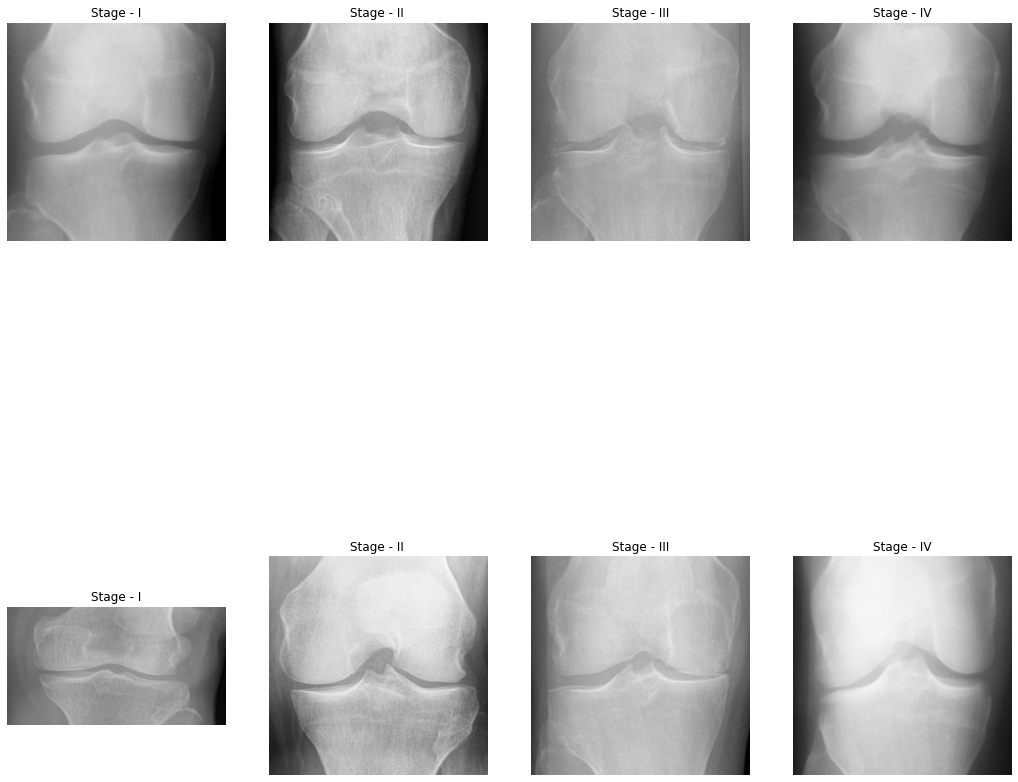

In [ ]:
classes=['Stage - I','Stage - II ','Stage - III','Stage - IV' ]
import random
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
import cv2

ig, ax = plt.subplots(2,4, figsize=(18,18))

for class_id in range(2):
      
    folder = os.path.join(train_data,str(class_id))
    os.chdir(folder)
    samples = random.sample(os.listdir(folder), 4)
    
    for col in range(4):

        image = cv2.imread(samples[col])
        ax[class_id, col].imshow(image)
        ax[class_id, col].set_title(classes[col])
        ax[class_id, col].set_axis_off()
    
plt.show()

# **GOOGLE NET**

In [ ]:
from tensorflow.keras.applications import InceptionV3 #GoogleNet
model1=InceptionV3(input_shape=(150,150,3),weights="imagenet",include_top=False)
model=keras.models.Sequential() # layer has 1 i/p and 1 o/p
model.add(model1)
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
from tensorflow.keras import optimizers
model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['acc'],optimizer=optimizers.RMSprop(1e-5))
from keras.callbacks import ModelCheckpoint,EarlyStopping
callback=ModelCheckpoint("best.h5",save_best_only=True) 
model.fit(train_df,validation_data=valid_df,epochs=100,callbacks=[callback])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


118/118 [==============================] - 37s 224ms/step - loss: 0.5467 - acc: 0.7030 - val_loss: 0.5121 - val_acc: 0.7083
Epoch 2/100
118/118 [==============================] - 24s 202ms/step - loss: 0.4780 - acc: 0.7549 - val_loss: 0.4906 - val_acc: 0.7598
Epoch 3/100
118/118 [==============================] - 25s 208ms/step - loss: 0.4184 - acc: 0.7928 - val_loss: 0.5663 - val_acc: 0.7754
Epoch 4/100
118/118 [==============================] - 25s 212ms/step - loss: 0.4064 - acc: 0.7974 - val_loss: 0.4725 - val_acc: 0.8050
Epoch 5/100
118/118 [==============================] - 25s 214ms/step - loss: 0.3994 - acc: 0.8004 - val_loss: 0.1777 - val_acc: 0.9360
Epoch 6/100
118/118 [==============================] - 28s 235ms/step - loss: 0.3611 - acc: 0.8289 - val_loss: 0.2410 - val_acc: 0.9002
Epoch 7/100
118/118 [==============================] - 23s 196ms/step - loss: 0.3311 - acc: 0.8494 - val_loss: 0.2433 - val_acc: 0.8892
Epoch 8/100
118/118 [==============================] - 24s 2

In [ ]:
historyL=model.fit(train_df,validation_data=valid_df,epochs=5,callbacks=[early_stop,callback]) 

Epoch 1/5
118/118 [==============================] - 27s 227ms/step - loss: 0.0948 - acc: 0.9698 - val_loss: 0.1530 - val_acc: 0.9626
Epoch 2/5
118/118 [==============================] - 30s 256ms/step - loss: 0.1138 - acc: 0.9647 - val_loss: 0.1238 - val_acc: 0.9704
Epoch 3/5
118/118 [==============================] - 27s 225ms/step - loss: 0.1046 - acc: 0.9677 - val_loss: 0.1706 - val_acc: 0.9626
Epoch 4/5
118/118 [==============================] - 28s 239ms/step - loss: 0.0952 - acc: 0.9621 - val_loss: 0.2601 - val_acc: 0.9594
Epoch 5/5
118/118 [==============================] - 27s 230ms/step - loss: 0.0925 - acc: 0.9685 - val_loss: 0.1747 - val_acc: 0.9610


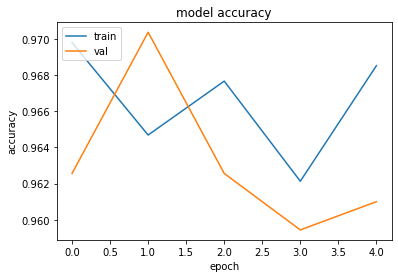

In [ ]:
plt.plot(historyL.history['acc'])
plt.plot(historyL.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               9437696   
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,240,993
Trainable params: 31,206,561
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:

y_pred=model.predict(test_df)
import numpy as np
np.where(y_pred > 0.5, 1,0)

5/5 [==============================] - 1s 76ms/step


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

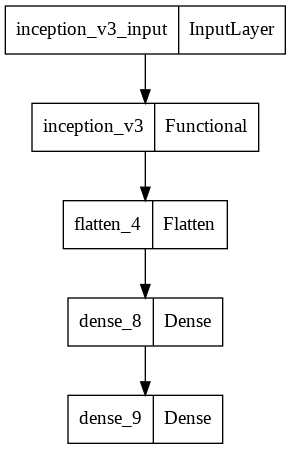

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
model.evaluate(test_df)

5/5 [==============================] - 0s 77ms/step - loss: 0.4696 - acc: 0.8381


[0.46964722871780396, 0.8380952477455139]

# VGG16

In [ ]:

from tensorflow.keras.applications import VGG16
model3=VGG16(input_shape=(150,150,3),weights="imagenet",include_top=False)
modelV=keras.models.Sequential()
modelV.add(model3)
modelV.add(keras.layers.Flatten())
modelV.add(keras.layers.Dense(512,activation="relu"))
modelV.add(keras.layers.Dense(1,activation="sigmoid",kernel_regularizer='l2'))
from tensorflow.keras import optimizers
modelV.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['acc'],optimizer=optimizers.RMSprop(1e-5))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
modelV.history

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
callback=ModelCheckpoint("best3.h5",save_best_only=True)
early_stop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True) 
modelV.fit(train_df,validation_data=valid_df,epochs=100,callbacks=[early_stop,callback])

Epoch 1/100
118/118 [==============================] - 38s 267ms/step - loss: 0.5601 - acc: 0.6881 - val_loss: 0.4121 - val_acc: 0.8627
Epoch 2/100
118/118 [==============================] - 27s 228ms/step - loss: 0.4260 - acc: 0.7983 - val_loss: 0.2057 - val_acc: 0.9407
Epoch 3/100
118/118 [==============================] - 27s 227ms/step - loss: 0.3552 - acc: 0.8426 - val_loss: 0.1675 - val_acc: 0.9423
Epoch 4/100
118/118 [==============================] - 26s 223ms/step - loss: 0.3157 - acc: 0.8647 - val_loss: 0.1261 - val_acc: 0.9641
Epoch 5/100
118/118 [==============================] - 26s 218ms/step - loss: 0.2912 - acc: 0.8872 - val_loss: 0.1612 - val_acc: 0.9314
Epoch 6/100
118/118 [==============================] - 26s 220ms/step - loss: 0.2742 - acc: 0.8923 - val_loss: 0.2345 - val_acc: 0.9064
Epoch 7/100
118/118 [==============================] - 27s 229ms/step - loss: 0.2532 - acc: 0.9004 - val_loss: 0.2597 - val_acc: 0.8830
Epoch 8/100
118/118 [===========================

In [ ]:
historyV=modelV.fit(train_df,validation_data=valid_df,epochs=5,callbacks=[early_stop,callback])

Epoch 1/5
118/118 [==============================] - 27s 228ms/step - loss: 0.1805 - acc: 0.9374 - val_loss: 0.0961 - val_acc: 0.9766
Epoch 2/5
118/118 [==============================] - 26s 219ms/step - loss: 0.1601 - acc: 0.9460 - val_loss: 0.0969 - val_acc: 0.9704
Epoch 3/5
118/118 [==============================] - 26s 218ms/step - loss: 0.1599 - acc: 0.9468 - val_loss: 0.1260 - val_acc: 0.9657
Epoch 4/5
118/118 [==============================] - 27s 228ms/step - loss: 0.1604 - acc: 0.9413 - val_loss: 0.1862 - val_acc: 0.9345
Epoch 5/5
118/118 [==============================] - 27s 227ms/step - loss: 0.1668 - acc: 0.9438 - val_loss: 0.1020 - val_acc: 0.9719


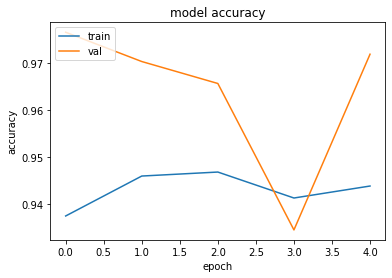

In [ ]:
plt.plot(historyV.history['acc'])
plt.plot(historyV.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
modelV.summary() #VGG


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               9437696   
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,240,993
Trainable params: 31,206,561
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
y2_pred=modelV.predict(test_df)

5/5 [==============================] - 1s 274ms/step


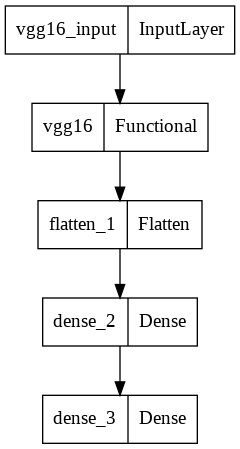

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(modelV)

In [ ]:
import numpy as np
np.where(y2_pred > 0.5, 1,0)

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
modelV.evaluate(test_df)

5/5 [==============================] - 0s 73ms/step - loss: 0.2770 - acc: 0.9048


[0.27701595425605774, 0.9047619104385376]

# **RESNET50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model2=ResNet50(input_shape=(150,150,3),weights="imagenet",include_top=False)
modelr=keras.models.Sequential()
modelr.add(model2)
modelr.add(keras.layers.Flatten())
modelr.add(keras.layers.Dense(512,activation="relu"))
modelr.add(keras.layers.Dense(1,activation="sigmoid"))
modelr.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['acc'],optimizer=optimizers.RMSprop(1e-5))
from keras.callbacks import ModelCheckpoint,EarlyStopping
callback=ModelCheckpoint("best2.h5",save_best_only=True) 
modelr.fit(train_df,validation_data=valid_df,epochs=100,callbacks=[callback])


94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


118/118 [==============================] - 42s 258ms/step - loss: 0.5700 - acc: 0.7464 - val_loss: 1.0058 - val_acc: 0.6724
Epoch 2/100
118/118 [==============================] - 25s 211ms/step - loss: 0.4633 - acc: 0.7919 - val_loss: 1.5376 - val_acc: 0.6724
Epoch 3/100
118/118 [==============================] - 26s 223ms/step - loss: 0.4117 - acc: 0.8209 - val_loss: 1.7783 - val_acc: 0.6724
Epoch 4/100
118/118 [==============================] - 26s 223ms/step - loss: 0.3856 - acc: 0.8345 - val_loss: 2.6594 - val_acc: 0.6724
Epoch 5/100
118/118 [==============================] - 26s 220ms/step - loss: 0.3503 - acc: 0.8523 - val_loss: 1.9351 - val_acc: 0.6724
Epoch 6/100
118/118 [==============================] - 25s 210ms/step - loss: 0.3305 - acc: 0.8604 - val_loss: 1.1658 - val_acc: 0.6724
Epoch 7/100
118/118 [==============================] - 26s 223ms/step - loss: 0.2957 - acc: 0.8804 - val_loss: 0.8999 - val_acc: 0.6771
Epoch 8/100
118/118 [==============================] - 26s 2

In [ ]:
historyr=modelr.fit(train_df,validation_data=valid_df,epochs=5,callbacks=[early_stop,callback])

Epoch 1/5
118/118 [==============================] - 27s 231ms/step - loss: 0.0749 - acc: 0.9740 - val_loss: 0.1657 - val_acc: 0.9735
Epoch 2/5
118/118 [==============================] - 27s 229ms/step - loss: 0.1051 - acc: 0.9715 - val_loss: 0.1092 - val_acc: 0.9766
Epoch 3/5
118/118 [==============================] - 27s 225ms/step - loss: 0.0686 - acc: 0.9740 - val_loss: 0.1920 - val_acc: 0.9688
Epoch 4/5
118/118 [==============================] - 31s 262ms/step - loss: 0.0994 - acc: 0.9753 - val_loss: 0.1041 - val_acc: 0.9766
Epoch 5/5
118/118 [==============================] - 25s 214ms/step - loss: 0.0813 - acc: 0.9736 - val_loss: 2.5433 - val_acc: 0.9392


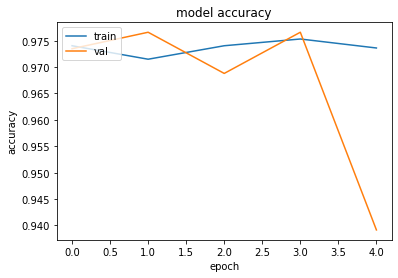

In [ ]:
plt.plot(historyr.history['acc'])
plt.plot(historyr.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
modelr.summary() #RESNET


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               26214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 49,803,137
Trainable params: 49,750,017
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
y1_pred=modelr.predict(test_df)

5/5 [==============================] - 0s 77ms/step


In [ ]:
import numpy as np

In [ ]:
np.where(y1_pred > 0.5, 1,0)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

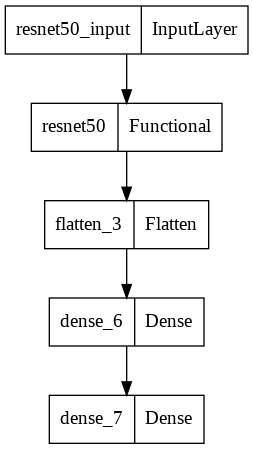

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(modelr)

In [ ]:
modelr.evaluate(test_df)

5/5 [==============================] - 0s 65ms/step - loss: 1.0459 - acc: 0.8190


[1.0458738803863525, 0.8190476298332214]

# **EfficientNetV2L**

In [ ]:
from tensorflow.keras.applications import EfficientNetV2L
model4=EfficientNetV2L(input_shape=(150,150,3),weights="imagenet",include_top=False)
model=keras.models.Sequential()
model.add(model4)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['acc'],optimizer=optimizers.RMSprop(1e-5))
from keras.callbacks import ModelCheckpoint,EarlyStopping
callback=ModelCheckpoint("best4.h5",save_best_only=True) 
model.fit(train_df,validation_data=valid_df,epochs=100,callbacks=[callback])

473176280/473176280 [==============================] - 15s 0us/step
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


118/118 [==============================] - 162s 780ms/step - loss: 0.6072 - acc: 0.6728 - val_loss: 0.4123 - val_acc: 0.8034
Epoch 2/100
118/118 [==============================] - 82s 695ms/step - loss: 0.5140 - acc: 0.7328 - val_loss: 0.3753 - val_acc: 0.8112
Epoch 3/100
118/118 [==============================] - 82s 692ms/step - loss: 0.4723 - acc: 0.7630 - val_loss: 0.2737 - val_acc: 0.8955
Epoch 4/100
118/118 [==============================] - 82s 692ms/step - loss: 0.4430 - acc: 0.7796 - val_loss: 0.2356 - val_acc: 0.9111
Epoch 5/100
118/118 [==============================] - 76s 647ms/step - loss: 0.4024 - acc: 0.8132 - val_loss: 0.3041 - val_acc: 0.8534
Epoch 6/100
118/118 [==============================] - 76s 643ms/step - loss: 0.3867 - acc: 0.8221 - val_loss: 0.2908 - val_acc: 0.8518
Epoch 7/100
118/118 [==============================] - 81s 688ms/step - loss: 0.3668 - acc: 0.8255 - val_loss: 0.1928 - val_acc: 0.9236
Epoch 8/100
118/118 [==============================] - 77s 

In [ ]:
historyL=model.fit(train_df,validation_data=valid_df,epochs=5,callbacks=[early_stop,callback])

Epoch 1/5
118/118 [==============================] - 26s 223ms/step - loss: 0.0832 - acc: 0.9711 - val_loss: 0.1465 - val_acc: 0.9657
Epoch 2/5
118/118 [==============================] - 23s 198ms/step - loss: 0.1085 - acc: 0.9609 - val_loss: 0.1011 - val_acc: 0.9704
Epoch 3/5
118/118 [==============================] - 26s 219ms/step - loss: 0.1060 - acc: 0.9604 - val_loss: 0.0818 - val_acc: 0.9860
Epoch 4/5
118/118 [==============================] - 23s 198ms/step - loss: 0.1090 - acc: 0.9638 - val_loss: 0.2650 - val_acc: 0.9579
Epoch 5/5
118/118 [==============================] - 25s 208ms/step - loss: 0.0936 - acc: 0.9677 - val_loss: 0.2033 - val_acc: 0.9563


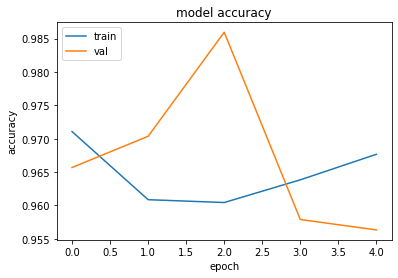

In [ ]:
plt.plot(historyL.history['acc'])
plt.plot(historyL.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               9437696   
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 31,240,993
Trainable params: 31,206,561
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
y4_pred=model.predict(test_df)

5/5 [==============================] - 6s 165ms/step


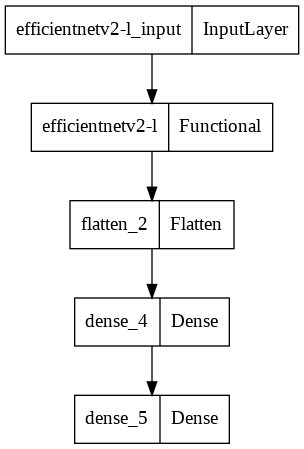

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
np.where(y4_pred > 0.5, 1,0)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
model.evaluate(test_df)

5/5 [==============================] - 2s 337ms/step - loss: 0.2147 - acc: 0.8857


[0.21474921703338623, 0.8857142925262451]

# Comparing 4 architectures 

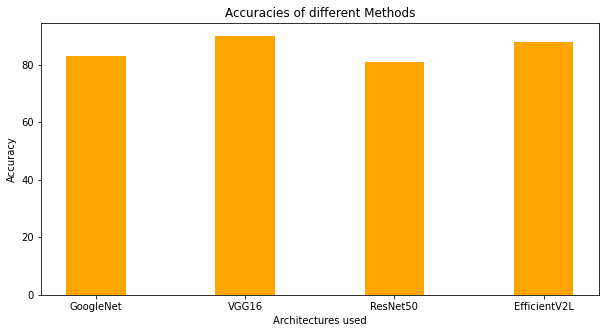

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'GoogleNet':83, 'VGG16':90, 'ResNet50':81,
        'EfficientV2L':88}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Architectures used")
plt.ylabel("Accuracy")
plt.title("Accuracies of different Methods")
plt.show()